<a href="https://colab.research.google.com/github/jtsheppard/DS-Unit-2-Linear-Models/blob/master/module1_log_Model_Boosting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!pip install wget 
import wget

In [0]:
#importing data
SOURCE = '../data/caterpillar/caterpillar-tube-pricing/competition_data/'

In [24]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-08-10 02:52:04--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip.1’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.04s   

2019-08-10 02:52:04 (17.6 MB/s) - ‘caterpillar-tube-pricing.zip.1’ saved [823789/823789]



In [25]:
!unzip -o caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [26]:
!unzip -o data.zip

Archive:  data.zip
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  inflating: competition_data/type

In [0]:

SOURCE = 'competition_data/'

In [0]:
from glob import glob

In [29]:
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/comp_boss.csv (147, 15)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_tee.csv (4, 14)
competition_data/comp_nut.csv (65, 11)
competition_data/tube.csv (21198, 16)
competition_data/comp_adaptor.csv (25, 20)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_straight.csv (361, 12)
competition_data/specs.csv (21198, 11)
competition_data/components.csv (2048, 3)
competition_data/comp_hfl.csv (6, 9)
competition_data/comp_float.csv (16, 7)
competition_data/tube_end_form.csv (27, 2)
competition_data/comp_threaded.csv (194, 32)
competition_data/comp_other.csv (1001, 3)
competition_data/train_set.csv (30213, 8)
competition_data/type_end_form.csv (8, 2)
competition_data/type_component.csv (29, 2)
competition_data/type_connection.csv (14, 2)
competition_data/comp_elbow.csv (178, 16)
competition_data/test_set.csv (30235, 8)


In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [31]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')
trainval.head(10)

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983


In [32]:
test.head(10)

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25
5,6,TA-00001,S-0066,2013-06-23,0,0,Yes,50
6,7,TA-00001,S-0066,2013-06-23,0,0,Yes,100
7,8,TA-00001,S-0066,2013-06-23,0,0,Yes,250
8,9,TA-00003,S-0066,2013-07-07,0,0,Yes,1
9,10,TA-00003,S-0066,2013-07-07,0,0,Yes,2


In [33]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
trainval['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [34]:
test['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [35]:
#checking test df for different tube assemblies
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [36]:
set(trainval_tube_assemblies), set(test_tube_assemblies)

({'TA-07656',
  'TA-12698',
  'TA-06425',
  'TA-12439',
  'TA-16630',
  'TA-07944',
  'TA-15710',
  'TA-15856',
  'TA-07043',
  'TA-15146',
  'TA-07648',
  'TA-11584',
  'TA-05171',
  'TA-03107',
  'TA-06369',
  'TA-15680',
  'TA-01949',
  'TA-13817',
  'TA-18833',
  'TA-19226',
  'TA-10370',
  'TA-18421',
  'TA-17682',
  'TA-02803',
  'TA-11082',
  'TA-07709',
  'TA-14452',
  'TA-10541',
  'TA-18627',
  'TA-05657',
  'TA-13394',
  'TA-20314',
  'TA-21032',
  'TA-03086',
  'TA-17944',
  'TA-20387',
  'TA-09453',
  'TA-16202',
  'TA-06965',
  'TA-10173',
  'TA-17739',
  'TA-20036',
  'TA-17254',
  'TA-03750',
  'TA-19255',
  'TA-02207',
  'TA-19760',
  'TA-18785',
  'TA-17714',
  'TA-06581',
  'TA-16343',
  'TA-20291',
  'TA-17960',
  'TA-15403',
  'TA-18284',
  'TA-14088',
  'TA-19666',
  'TA-05702',
  'TA-06044',
  'TA-00153',
  'TA-14629',
  'TA-17591',
  'TA-02175',
  'TA-04717',
  'TA-03151',
  'TA-11413',
  'TA-11035',
  'TA-07128',
  'TA-00394',
  'TA-09009',
  'TA-12196',
  'TA-

In [37]:
trainval_tube_assemblies

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [38]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42
)
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [39]:
set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [40]:
train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [41]:
len(train) + len(val) == len(trainval)

True

In [42]:
#baseline
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [43]:
train.describe(exclude='number')

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01 00:00:00,Yes
freq,12,15391,2077,19699
first,NaN,NaN,1987-04-10 00:00:00,NaN
last,NaN,NaN,2017-01-01 00:00:00,NaN


In [0]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
from sklearn.metrics import mean_squared_log_error

In [46]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9418101276064408


In [47]:
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2, Mean Baseline: -4.701447715138585e-06


In [48]:
# deleope a first moodel to compare to baseline
train['cost'].mean()

13.450499769517025

In [49]:
train.groupby('quantity')['cost'].mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [50]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_val, y_val)
print('Validation R^2', r2)

Validation R^2 0.08879518736792147


In [51]:
y_pred = model.predict(X_val)
print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6908805822519186


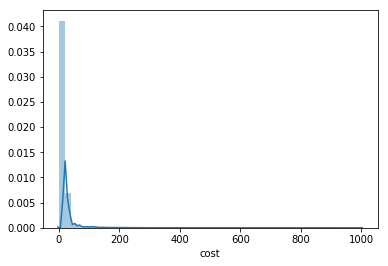

In [52]:
#Log transform regression target with right-skewed distrobution
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

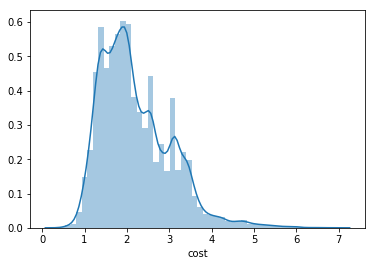

In [53]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

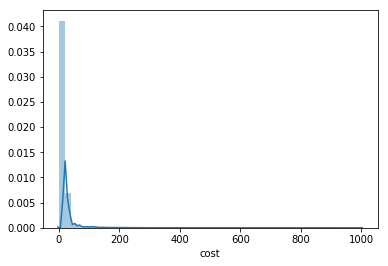

In [54]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [55]:
all(np.isclose(y_train_log_exp, y_train))

True

In [56]:
#Refit MOdel with log-transformed data
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.622925465880199

In [57]:
#RMSLE with original targets = RMSE with log-transformed targets
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_val_log = np.log1p(y_val)
rmse(y_val_log, y_pred_log)

0.622925465880199

In [58]:
pip install category_encoders

     |████████████████████████████████| 92kB 4.2MB/s 


In [59]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [60]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_date_year', 'quote_date_month']


In [61]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]

import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3950096664322286

In [62]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3950096664322286

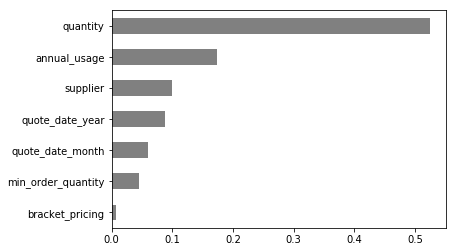

In [63]:
#feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh(color='grey');

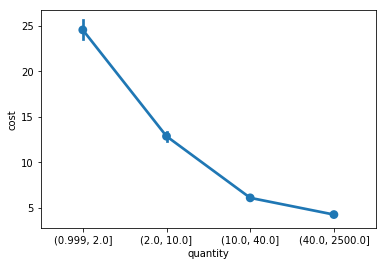

In [64]:
quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)
sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

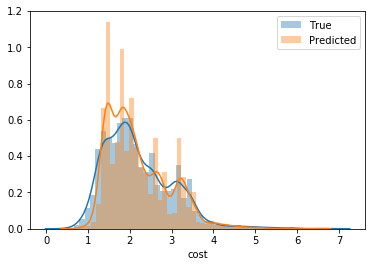

In [65]:
import matplotlib.pyplot as plt
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [66]:
#feature engineering with relational data
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'mi

In [0]:
tube = pd.read_csv('competition_data/tube.csv')

In [68]:
tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [69]:
tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-00769,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    X = X.merge(tube, how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X


train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [71]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [72]:
train_wrangled.shape, val_wrangled.shape

((22628, 23), (7585, 23))

In [73]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [0]:
X_train = train_wrangled.drop(columns=target)
X_val = val_wrangled.drop(columns=target)

In [75]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
               

In [76]:
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3071425826783341

In [77]:
test_wrangled = wrangle(test)
X_test = test_wrangled.drop(columns='id')
all(X_test.columns == X_train.columns)

True

In [0]:
X_test.fillna(X_train.mean(), inplace=True)

In [0]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
#continuing with new methods on same data

In [0]:
#feature engineering with relational data
SOURCE = 'competition_data/'

In [82]:
materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
materials.describe(exclude='number')

,tube_assembly_id,component_id_1,component_id_2,component_id_3,component_id_4,component_id_5,component_id_6,component_id_7,component_id_8
count,21198,19149,14786,4791,607,92,26,7,1
unique,21198,1079,834,509,204,62,19,4,1
top,TA-00769,C-1621,C-1628,C-1641,C-1660,C-0872,C-0923,C-1019,C-1981
freq,1,2043,1959,421,62,10,3,3,1


In [84]:
materials.isnull().sum()/len(materials)

tube_assembly_id    0.000000
component_id_1      0.096660
quantity_1          0.096660
component_id_2      0.302481
quantity_2          0.302481
component_id_3      0.773988
quantity_3          0.773658
component_id_4      0.971365
quantity_4          0.971318
component_id_5      0.995660
quantity_5          0.995660
component_id_6      0.998773
quantity_6          0.998773
component_id_7      0.999670
quantity_7          0.999670
component_id_8      0.999953
quantity_8          0.999953
dtype: float64

In [85]:
components = pd.read_csv(SOURCE + 'components.csv')
components.describe()

,component_id,name,component_type_id
count,2048,2047,2048
unique,2048,297,29
top,C-0297,FLANGE,OTHER
freq,1,350,1006


In [86]:
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [87]:
components['name'].nunique()

297

In [88]:
glob(SOURCE + '*.csv')

['competition_data/comp_boss.csv',
 'competition_data/bill_of_materials.csv',
 'competition_data/comp_tee.csv',
 'competition_data/comp_nut.csv',
 'competition_data/tube.csv',
 'competition_data/comp_adaptor.csv',
 'competition_data/comp_sleeve.csv',
 'competition_data/comp_straight.csv',
 'competition_data/specs.csv',
 'competition_data/components.csv',
 'competition_data/comp_hfl.csv',
 'competition_data/comp_float.csv',
 'competition_data/tube_end_form.csv',
 'competition_data/comp_threaded.csv',
 'competition_data/comp_other.csv',
 'competition_data/train_set.csv',
 'competition_data/type_end_form.csv',
 'competition_data/type_component.csv',
 'competition_data/type_connection.csv',
 'competition_data/comp_elbow.csv',
 'competition_data/test_set.csv']

In [0]:
from glob import glob

data = {}
for path in glob(SOURCE + '*.csv'):
    df = pd.read_csv(path)
    filename = path.split('/')[-1]#look into
    name = filename.split('.')[0]
    data[name] = df

In [90]:
data.keys()

dict_keys(['comp_boss', 'bill_of_materials', 'comp_tee', 'comp_nut', 'tube', 'comp_adaptor', 'comp_sleeve', 'comp_straight', 'specs', 'components', 'comp_hfl', 'comp_float', 'tube_end_form', 'comp_threaded', 'comp_other', 'train_set', 'type_end_form', 'type_component', 'type_connection', 'comp_elbow', 'test_set'])

In [92]:
data['comp_sleeve'].head()

,component_id,component_type_id,connection_type_id,length,intended_nut_thread,intended_nut_pitch,unique_feature,plating,orientation,weight
0,C-0001,CP-024,B-001,17.3,1.062,12,No,No,No,0.013
1,C-0002,CP-024,B-001,11.2,0.500,20,No,No,No,0.005
2,C-0003,CP-024,B-001,19.3,1.187,12,No,No,No,0.014
3,C-0048,CP-024,B-002,9.5,0.562,18,No,No,No,0.006
4,C-0049,CP-024,B-002,9.5,0.812,16,No,No,No,0.012


In [93]:
#use cgboost for gradieant boosting
!pip install xgboost
from xgboost import XGBRegressor

In [0]:
#pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators = 1000, n_jpb=-1)
)

In [95]:
#fit
pipeline.fit(X_train,y_train_log)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:52:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, m

In [96]:
#validate
y_pred_log = pipeline.predict(X_val)
print('Validation error', rmse(y_val_log, y_pred_log))

Validation error 0.29397781038226706


In [0]:
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-02.csv')

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [0]:
eval_set = [
    (X_train_encoded, y_train_log),
    (X_val_encoded, y_val_log)
]

In [100]:
model = XGBRegressor(n_estimators=1000, n_job=-1)

model.fit(X_train_encoded, 
          y_train_log, 
          eval_set=eval_set,
          eval_metric='rmse',
          early_stopping_rounds=10
         )

[02:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.56516	validation_1-rmse:1.55498
[2]	validation_0-rmse:1.42805	validation_1-rmse:1.41868
[3]	validation_0-rmse:1.3038	validation_1-rmse:1.29472


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[4]	validation_0-rmse:1.19233	validation_1-rmse:1.18372
[5]	validation_0-rmse:1.09432	validation_1-rmse:1.08627
[6]	validation_0-rmse:1.00669	validation_1-rmse:0.999136
[7]	validation_0-rmse:0.930868	validation_1-rmse:0.923643
[8]	validation_0-rmse:0.862939	validation_1-rmse:0.856299
[9]	validation_0-rmse:0.803184	validation_1-rmse:0.796445
[10]	validation_0-rmse:0.751262	validation_1-rmse:0.745282
[11]	validation_0-rmse:0.706111	validation_1-rmse:0.700649
[12]	validation_0-rmse:0.664843	validation_1-rmse:0.659469
[13]	validation_0-rmse:0.630448	validation_1-rmse:0.625834
[14]	validation_0-rmse:0.600932	validation_1-rmse:0.596763
[15]	validation_0-rmse:0.573588	validation_1-rmse:0.569537
[16]	validation_0-rmse:0.551586	validation_1-rmse:0.546926
[17]	validation_0-rmse:0.532086	validation_1-rmse:0.528199
[18]	validation_0-rmse:0.515103	validation_1-rmse:0.511635
[19]	validation_0-rmse:0.498263	validation_1-rmse:0.494894
[20]	validation_0-rmse:0.485996	validation_1-rmse:0.482858
[21]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

(0.2, 0.4)

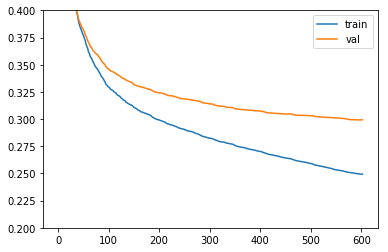

In [101]:
results = model.evals_result()

train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

epochs = range(0, len(train_rmse))

plt.plot(epochs, train_rmse, label='train')
plt.plot(epochs, val_rmse, label='val')
plt.legend();
plt.ylim(0.2, 0.4)

In [102]:
!pip install catboost
from catboost import CatBoostRegressor

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    CatBoostRegressor(learning_rate=0.3)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

     |████████████████████████████████| 61.8MB 65.5MB/s 
0:	learn: 1.7131692	total: 72.8ms	remaining: 1m 12s
1:	learn: 1.2580153	total: 93.9ms	remaining: 46.9s
2:	learn: 0.9542406	total: 115ms	remaining: 38.1s
3:	learn: 0.7578381	total: 134ms	remaining: 33.4s
4:	learn: 0.6133605	total: 155ms	remaining: 30.8s
5:	learn: 0.5294020	total: 175ms	remaining: 29.1s
6:	learn: 0.4725538	total: 195ms	remaining: 27.7s
7:	learn: 0.4408233	total: 215ms	remaining: 26.6s
8:	learn: 0.4156062	total: 234ms	remaining: 25.8s
9:	learn: 0.4024415	total: 255ms	remaining: 25.2s
10:	learn: 0.3926765	total: 282ms	remaining: 25.3s
11:	learn: 0.3859206	total: 300ms	remaining: 24.7s
12:	learn: 0.3755742	total: 321ms	remaining: 24.4s
13:	learn: 0.3733386	total: 343ms	remaining: 24.1s
14:	learn: 0.3654079	total: 365ms	remaining: 24s
15:	learn: 0.3623774	total: 385ms	remaining: 23.7s
16:	learn: 0.3560303	total: 407ms	remaining: 23.5s
17:	learn: 0.3537026	total: 426ms	remaining: 23.2s
18:	learn: 0.3502014	total: 445ms	

In [106]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    lgbm.sklearn.LGBMRegressor(learning_rate=0.2)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.2871460494839737


In [0]:
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-03.csv')